The code

In [1]:
import pandas as pd
import geopandas
import shapely
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

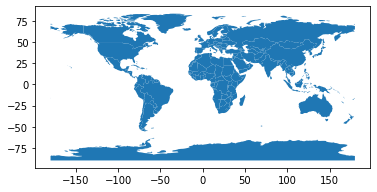

In [90]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

#geo_map = geopandas.GeoDataFrame(plot_gini)

geo_geo = pd.read_csv("worldcities.csv")

#map_map = geopandas.GeoDataFrame(geo_map, geometry=geopandas.points_from_xy(geo_geo.lng, geo_geo.lat))

#geo_geo = geo_geo[geo_geo[admin_name]]
world= world.rename(columns={"name": "Country"})
europe =  world.query('continent == "Europe"')
europe.drop(europe[europe.Country == "Russia"].index, inplace=True)
#europe.drop(europe[europe.Country == "France"].index, inplace=True)
india =  world.query('Country == "India"')


Polygons = (europe.loc[43].at['geometry'])[1]
#print(Polygons)
europe.loc[europe['Country'] == 'France', 'geometry'] = Polygons
world.plot()

In [3]:
Polygons2 = (europe.loc[21].at['geometry'])[1]
#print(Polygons)
europe.loc[europe['Country'] == 'Norway', 'geometry'] = Polygons2

In [4]:
green_food_total = pd.read_csv("Daily_green_tquintile.csv")
green_food_total.head(3)

N_PORTION                            GEO        UNIT  TIME  \
0            0 portions  European Union - 28 countries  Percentage  2014   
1  From 1 to 4 portions  European Union - 28 countries  Percentage  2014   
2    5 portions or more  European Union - 28 countries  Percentage  2014   

  QUANTILE    SEX    AGE  Value  Flag and Footnotes  
0    Total  Total  Total   34.4                 NaN  
1    Total  Total  Total   51.4                 NaN  
2    Total  Total  Total   14.3                 NaN

In [5]:
green_food_total = green_food_total.sort_values(by=["N_PORTION", "GEO"])
green_food_total.head(3)

N_PORTION       GEO        UNIT  TIME QUANTILE    SEX    AGE  Value  \
60  0 portions   Austria  Percentage  2014    Total  Total  Total   31.8   
3   0 portions   Belgium  Percentage  2014    Total  Total  Total   16.1   
6   0 portions  Bulgaria  Percentage  2014    Total  Total  Total   58.6   

    Flag and Footnotes  
60                 NaN  
3                  NaN  
6                  NaN

In [6]:
green_food_total = green_food_total.drop(columns=['QUANTILE', 'SEX', "UNIT",  "AGE", "Flag and Footnotes", "TIME"])
green_food_total.head()

N_PORTION       GEO  Value
60  0 portions   Austria   31.8
3   0 portions   Belgium   16.1
6   0 portions  Bulgaria   58.6
33  0 portions   Croatia   27.5
39  0 portions    Cyprus   32.6

In [7]:

green_food_total = green_food_total.replace("European Union - 28 countries", "European Union")
green_food_total = green_food_total.replace("Germany (until 1990 former territory of the FRG)", "Germany")
green_food_total = green_food_total.replace("From 1 to 4 portions", "1 to 4 portions")
green_food_total = green_food_total.sort_values(by=["N_PORTION", "GEO"])
green_daily_total = green_food_total 
green_daily_total.head(5)

N_PORTION       GEO  Value
60  0 portions   Austria   31.8
3   0 portions   Belgium   16.1
6   0 portions  Bulgaria   58.6
33  0 portions   Croatia   27.5
39  0 portions    Cyprus   32.6

In [8]:
alcohool_total = pd.read_csv("Frequency_alcohol_tquintile.csv")
alcohool_total.head(3)

FREQUENC                            GEO        UNIT QUANTILE  TIME  \
0    Every day  European Union - 28 countries  Percentage    Total  2014   
1   Every week  European Union - 28 countries  Percentage    Total  2014   
2  Every month  European Union - 28 countries  Percentage    Total  2014   

     SEX    AGE  Value Flag and Footnotes  
0  Total  Total    9.2                  e  
1  Total  Total   29.6                  e  
2  Total  Total   23.1                  e

In [9]:
alcohool_total = alcohool_total.drop(columns=['QUANTILE', 'SEX', "UNIT",  "AGE", "Flag and Footnotes", "TIME"])

In [10]:
alcohool_total = alcohool_total.replace("European Union - 28 countries", "European Union")
alcohool_total = alcohool_total.replace("Germany (until 1990 former territory of the FRG)", "Germany")
alcohool_total.head(5)

FREQUENC             GEO  Value
0                           Every day  European Union    9.2
1                          Every week  European Union   29.6
2                         Every month  European Union   23.1
3              Less than once a month  European Union   14.2
4  Never or not in the last 12 months  European Union   23.9

In [11]:
alcohool_total = alcohool_total.sort_values(by=["FREQUENC", "GEO"])
alcohool_total.head(5)

FREQUENC       GEO  Value
90  Every day   Austria    6.2
5   Every day   Belgium   14.2
10  Every day  Bulgaria    8.9
50  Every day   Croatia    9.1
60  Every day    Cyprus    4.2

In [12]:
quintile_share = pd.read_csv("ilc_di11_1_Data.csv")
quintile_share.head(3)

TIME                            GEO  \
0  2014  European Union - 28 countries   
1  2014                        Belgium   
2  2014                       Bulgaria   

                                            INDIC_IL    AGE    SEX  Value  \
0  Inequality of income distribution (income quin...  Total  Total    5.2   
1  Inequality of income distribution (income quin...  Total  Total    3.8   
2  Inequality of income distribution (income quin...  Total  Total    6.8   

  Flag and Footnotes  
0                NaN  
1                NaN  
2                NaN

In [13]:
quintile_share = quintile_share.drop(columns=['INDIC_IL', 'AGE', "SEX",  "Flag and Footnotes", "TIME"])
quintile_share.head(3)

GEO  Value
0  European Union - 28 countries    5.2
1                        Belgium    3.8
2                       Bulgaria    6.8

In [14]:
quintile_share = quintile_share.replace("European Union - 28 countries", "European Union")
quintile_share = quintile_share.replace("Germany (until 1990 former territory of the FRG)", "Germany")
quintile_share.head(5)

GEO  Value
0  European Union    5.2
1         Belgium    3.8
2        Bulgaria    6.8
3         Czechia    3.5
4         Denmark    4.1

In [15]:

quintile_share = quintile_share.sort_values(by=["Value"], ascending = False)
quintile_share.head(5)

GEO  Value
33           Serbia    9.4
34           Turkey    8.3
32  North Macedonia    7.2
23          Romania    7.2
2          Bulgaria    6.8

In [16]:
minutes_physical_total = pd.read_csv("Time_physical_income_tquintile.csv")
minutes_physical_total.head()

DURATION                                               GEO        UNIT  \
0  Zero minutes                     European Union - 28 countries  Percentage   
1  Zero minutes                                          Bulgaria  Percentage   
2  Zero minutes                                           Czechia  Percentage   
3  Zero minutes                                           Denmark  Percentage   
4  Zero minutes  Germany (until 1990 former territory of the FRG)  Percentage   

  QUANTILE  TIME    SEX    AGE  Value  Flag and Footnotes  
0    Total  2014  Total  Total   48.8                 NaN  
1    Total  2014  Total  Total   82.7                 NaN  
2    Total  2014  Total  Total   47.4                 NaN  
3    Total  2014  Total  Total   18.7                 NaN  
4    Total  2014  Total  Total   28.8                 NaN

In [17]:
minutes_physical_total = minutes_physical_total.drop(columns=['UNIT', 'QUANTILE', "TIME",  "SEX", "AGE", "Flag and Footnotes"])
minutes_physical_total.head()

DURATION                                               GEO  Value
0  Zero minutes                     European Union - 28 countries   48.8
1  Zero minutes                                          Bulgaria   82.7
2  Zero minutes                                           Czechia   47.4
3  Zero minutes                                           Denmark   18.7
4  Zero minutes  Germany (until 1990 former territory of the FRG)   28.8

In [18]:
minutes_physical_total = minutes_physical_total.replace("European Union - 28 countries", "European Union")
minutes_physical_total = minutes_physical_total.replace("Germany (until 1990 former territory of the FRG)", "Germany")
minutes_physical_total.head(3)

DURATION             GEO  Value
0  Zero minutes  European Union   48.8
1  Zero minutes        Bulgaria   82.7
2  Zero minutes         Czechia   47.4

In [19]:
alcohool_1q = pd.read_csv("Frequency_alcohol_1quintile.csv")
alcohool_1q.head(3)

FREQUENC                            GEO        UNIT        QUANTILE  \
0    Every day  European Union - 28 countries  Percentage  First quintile   
1   Every week  European Union - 28 countries  Percentage  First quintile   
2  Every month  European Union - 28 countries  Percentage  First quintile   

   TIME    SEX    AGE  Value Flag and Footnotes  
0  2014  Total  Total    7.7                  e  
1  2014  Total  Total   22.4                  e  
2  2014  Total  Total   22.2                  e

In [20]:
alcohool_1q = alcohool_1q.replace("European Union - 28 countries", "European Union")
alcohool_1q = alcohool_1q.replace("Germany (until 1990 former territory of the FRG)", "Germany")
alcohool_1q.head(5)

FREQUENC             GEO        UNIT  \
0                           Every day  European Union  Percentage   
1                          Every week  European Union  Percentage   
2                         Every month  European Union  Percentage   
3              Less than once a month  European Union  Percentage   
4  Never or not in the last 12 months  European Union  Percentage   

         QUANTILE  TIME    SEX    AGE  Value Flag and Footnotes  
0  First quintile  2014  Total  Total    7.7                  e  
1  First quintile  2014  Total  Total   22.4                  e  
2  First quintile  2014  Total  Total   22.2                  e  
3  First quintile  2014  Total  Total   15.2                  e  
4  First quintile  2014  Total  Total   32.4                  e

In [21]:
alcohool_1q = alcohool_1q.drop(columns=['QUANTILE', 'SEX', "UNIT",  "AGE", "Flag and Footnotes", "TIME"])

In [22]:
alcohool_1q = alcohool_1q.sort_values(by=["FREQUENC", "GEO"])
alcohool_1q.head(5)

FREQUENC       GEO  Value
90  Every day   Austria    4.3
5   Every day   Belgium   10.6
10  Every day  Bulgaria    8.7
50  Every day   Croatia    6.7
60  Every day    Cyprus    3.1

In [23]:
alcohool_5q = pd.read_csv("Frequency_alcohol_5quintile.csv")
alcohool_5q.head(3)

FREQUENC                            GEO        UNIT        QUANTILE  \
0    Every day  European Union - 28 countries  Percentage  Fifth quintile   
1   Every week  European Union - 28 countries  Percentage  Fifth quintile   
2  Every month  European Union - 28 countries  Percentage  Fifth quintile   

   TIME    SEX    AGE  Value Flag and Footnotes  
0  2014  Total  Total   10.8                  e  
1  2014  Total  Total   39.1                  e  
2  2014  Total  Total   23.2                  e

In [24]:
alcohool_5q = alcohool_5q.replace("European Union - 28 countries", "European Union")
alcohool_5q = alcohool_5q.replace("Germany (until 1990 former territory of the FRG)", "Germany")
alcohool_5q.FREQUENC.unique()

array(['Every day', 'Every week', 'Every month', 'Less than once a month',
       'Never or not in the last 12 months'], dtype=object)

In [25]:
alcohool_5q = alcohool_5q.drop(columns=['QUANTILE', 'SEX', "UNIT",  "AGE", "Flag and Footnotes", "TIME"])

In [26]:
alcohool_5q = alcohool_5q.sort_values(by=["FREQUENC", "GEO"])
alcohool_5q.tail(3)

FREQUENC             GEO  Value
129  Never or not in the last 12 months          Sweden    4.8
149  Never or not in the last 12 months          Turkey   76.6
134  Never or not in the last 12 months  United Kingdom    6.3

In [27]:
# alcohoolism = alcohool_total.drop(columns=['QUANTILE', 'SEX', "UNIT",  "AGE", "Flag and Footnotes", "TIME"])

In [28]:
alcohool_death = pd.read_csv("hlth_cd_asdr2_1_Data.csv")
alcohool_death.head(3)

TIME       GEO  UNIT    SEX    AGE  \
0  2014   Denmark  Rate  Total  Total   
1  2014  Slovenia  Rate  Total  Total   
2  2014    Latvia  Rate  Total  Total   

                                               ICD10  Value Flag and Footnotes  
0  Mental and behavioural disorders due to use of...  11.49                NaN  
1  Mental and behavioural disorders due to use of...   9.67                NaN  
2  Mental and behavioural disorders due to use of...   6.79                NaN

In [29]:
alcohool_death = alcohool_death.drop(columns=['ICD10', 'SEX', "UNIT",  "AGE", "Flag and Footnotes", "TIME"])

In [30]:

alcohool_death = alcohool_death.replace("European Union - 28 countries", "European Union")
alcohool_death = alcohool_death.replace("Germany (until 1990 former territory of the FRG)", "Germany")
alcohool_death.head()


GEO  Value
0   Denmark  11.49
1  Slovenia   9.67
2    Latvia   6.79
3   Germany   5.83
4   Austria   5.39

In [31]:
alcohool_heavy = pd.read_csv("hlth_ehis_al3e_1_Data.csv")
alcohool_heavy.head(3)

FREQUENC                            GEO        UNIT  TIME  \
0  At least once a week  European Union - 28 countries  Percentage  2014   
1  At least once a week                        Belgium  Percentage  2014   
2  At least once a week                       Bulgaria  Percentage  2014   

                  ISCED11    SEX    AGE  Value Flag and Footnotes  
0  All ISCED 2011 levels   Total  Total    5.5                  e  
1  All ISCED 2011 levels   Total  Total    8.5                  u  
2  All ISCED 2011 levels   Total  Total    2.1                NaN

In [32]:
alcohool_heavy = alcohool_heavy.replace("European Union - 28 countries", "European Union")
alcohool_heavy = alcohool_heavy.replace("Germany (until 1990 former territory of the FRG)", "Germany")
alcohool_heavy.head(3)

FREQUENC             GEO        UNIT  TIME  \
0  At least once a week  European Union  Percentage  2014   
1  At least once a week         Belgium  Percentage  2014   
2  At least once a week        Bulgaria  Percentage  2014   

                  ISCED11    SEX    AGE  Value Flag and Footnotes  
0  All ISCED 2011 levels   Total  Total    5.5                  e  
1  All ISCED 2011 levels   Total  Total    8.5                  u  
2  All ISCED 2011 levels   Total  Total    2.1                NaN

In [33]:
alcohool_heavy = alcohool_heavy.drop(columns=['UNIT', 'TIME', "ISCED11",  "SEX", "AGE", "Flag and Footnotes"])

In [34]:
alcohool_heavy = alcohool_heavy.rename(columns={"Value": "Binge-Drink(%)"})

alcohool_heavy.head(3)

FREQUENC             GEO  Binge-Drink(%)
0  At least once a week  European Union             5.5
1  At least once a week         Belgium             8.5
2  At least once a week        Bulgaria             2.1

In [35]:
%whos DataFrame

Variable                 Type         Data/Info
-----------------------------------------------
alcohool_1q              DataFrame                             <...>n\n[150 rows x 3 columns]
alcohool_5q              DataFrame                             <...>n\n[150 rows x 3 columns]
alcohool_death           DataFrame                   GEO  Value<...>34   Liechtenstein      :
alcohool_heavy           DataFrame                    FREQUENC <...>   Turkey             2.9
alcohool_total           DataFrame                             <...>n\n[150 rows x 3 columns]
geo_geo                  DataFrame                    city     <...>[12959 rows x 11 columns]
green_daily_total        DataFrame                 N_PORTION   <...>\n\n[96 rows x 3 columns]
green_food_total         DataFrame                 N_PORTION   <...>\n\n[96 rows x 3 columns]
minutes_physical_total   DataFrame                    DURATION <...>n\n[120 rows x 3 columns]
quintile_share           DataFrame                    GEO 

In [36]:
quintile_share = quintile_share.rename(columns={"Value": "Quintile Share"})

In [37]:
alcohool_death = alcohool_death.rename(columns={"Value": "Alcohol Deaths"})
alcohool_death.head(3)

GEO Alcohol Deaths
0   Denmark          11.49
1  Slovenia           9.67
2    Latvia           6.79

In [38]:
alcohol_country = quintile_share.merge(alcohool_death, on  = "GEO", how="left")
alcohol_country.shape

(35, 3)

In [39]:
alcohol_country.head(3)

GEO  Quintile Share Alcohol Deaths
0           Serbia             9.4           3.79
1           Turkey             8.3           0.05
2  North Macedonia             7.2            NaN

In [40]:
alcohool_everyday = alcohool_total.loc[alcohool_total['FREQUENC'] == 'Every day']
alcohool_everyday = alcohool_everyday.rename(columns={"Value": "Alcohol Everyday (%)"})
alcohool_everyday.shape

(30, 3)

In [41]:
alcohool_everyday = alcohool_everyday.drop(columns="FREQUENC")

In [42]:
alcohool_everyday.head(3)

GEO  Alcohol Everyday (%)
90   Austria                   6.2
5    Belgium                  14.2
10  Bulgaria                   8.9

In [43]:
alcohol_country = alcohol_country.merge(alcohool_everyday, on  = "GEO", how= "left")

In [44]:
alcohol_country = alcohol_country.astype({'Alcohol Deaths': 'float64'})
alcohol_country.dtypes

GEO                      object
Quintile Share          float64
Alcohol Deaths          float64
Alcohol Everyday (%)    float64
dtype: object

In [45]:
#sns.pairplot(data=alcohol_country, kind="reg", plot_kws={'line_kws':{'color':'red'} ,'scatter_kws':{'alpha':0.7}})


In [46]:
alcohool_everyday5q = alcohool_5q.loc[alcohool_5q['FREQUENC'] == 'Every day']
alcohool_everyday5q = alcohool_everyday5q.rename(columns={"Value": "Alcohol Everyday Bottom (%)"})

alcohool_everymonth5q = alcohool_5q.loc[alcohool_5q['FREQUENC'] == 'Every month']
alcohool_everymonth5q = alcohool_everymonth5q.rename(columns={"Value": "Alcohol Month Bottom (%)"})

alcohool_everymonth5q.tail(3)

FREQUENC             GEO  Alcohol Month Bottom (%)
127  Every month          Sweden                      24.7
147  Every month          Turkey                       8.1
132  Every month  United Kingdom                      14.7

In [47]:
alcohool_everyday1q = alcohool_1q.loc[alcohool_1q['FREQUENC'] == 'Every day']
alcohool_everyday1q = alcohool_everyday1q.rename(columns={"Value": "Alcohol Everyday Top (%)"})

alcohool_everymonth1q = alcohool_1q.loc[alcohool_1q['FREQUENC'] == 'Every month']
alcohool_everymonth1q = alcohool_everymonth1q.rename(columns={"Value": "Alcohol Month Top (%)"})

In [48]:
alcohool_heavy_month = alcohool_heavy.loc[alcohool_heavy['FREQUENC'] == 'Every month']
alcohool_heavy_month = alcohool_heavy_month.rename(columns={"Binge-Drink(%)": "Binge-Drink Monthly(%)"})
alcohool_heavy_month.head(3)

FREQUENC             GEO  Binge-Drink Monthly(%)
30  Every month  European Union                    14.4
31  Every month         Belgium                    19.0
32  Every month        Bulgaria                    15.0

In [49]:
alcohool_everyday1q = alcohool_everyday1q.drop(columns="FREQUENC")
alcohool_everymonth1q = alcohool_everymonth1q.drop(columns="FREQUENC")

alcohool_everyday5q = alcohool_everyday5q.drop(columns="FREQUENC")
alcohool_everymonth5q = alcohool_everymonth5q.drop(columns="FREQUENC")

alcohool_heavy_month = alcohool_heavy_month.drop(columns="FREQUENC")

In [50]:
alcohool_everymonth5q.head()

GEO  Alcohol Month Bottom (%)
92   Austria                      30.3
7    Belgium                      22.2
12  Bulgaria                      31.1
52   Croatia                      22.9
62    Cyprus                      27.1

In [51]:
alcohol_country2 = alcohol_country.merge(alcohool_everyday1q, on  = "GEO", how = "left")
alcohol_country2.head(3)

GEO  Quintile Share  Alcohol Deaths  Alcohol Everyday (%)  \
0           Serbia             9.4            3.79                   NaN   
1           Turkey             8.3            0.05                   0.5   
2  North Macedonia             7.2             NaN                   NaN   

   Alcohol Everyday Top (%)  
0                       NaN  
1                       0.4  
2                       NaN

In [52]:
alcohol_country2 = alcohol_country2.merge(alcohool_everyday5q, on  = "GEO", how = "left")
alcohol_country2.head(3)

GEO  Quintile Share  Alcohol Deaths  Alcohol Everyday (%)  \
0           Serbia             9.4            3.79                   NaN   
1           Turkey             8.3            0.05                   0.5   
2  North Macedonia             7.2             NaN                   NaN   

   Alcohol Everyday Top (%)  Alcohol Everyday Bottom (%)  
0                       NaN                          NaN  
1                       0.4                          0.7  
2                       NaN                          NaN

In [53]:
alcohol_country2 = alcohol_country2.merge(alcohool_everymonth1q, on  = "GEO", how = "left")
alcohol_country2.head(3)

GEO  Quintile Share  Alcohol Deaths  Alcohol Everyday (%)  \
0           Serbia             9.4            3.79                   NaN   
1           Turkey             8.3            0.05                   0.5   
2  North Macedonia             7.2             NaN                   NaN   

   Alcohol Everyday Top (%)  Alcohol Everyday Bottom (%)  \
0                       NaN                          NaN   
1                       0.4                          0.7   
2                       NaN                          NaN   

   Alcohol Month Top (%)  
0                    NaN  
1                    3.3  
2                    NaN

In [54]:
alcohol_country2 = alcohol_country2.merge(alcohool_everymonth5q, on  = "GEO", how = "left")
alcohol_country2.head(3)

GEO  Quintile Share  Alcohol Deaths  Alcohol Everyday (%)  \
0           Serbia             9.4            3.79                   NaN   
1           Turkey             8.3            0.05                   0.5   
2  North Macedonia             7.2             NaN                   NaN   

   Alcohol Everyday Top (%)  Alcohol Everyday Bottom (%)  \
0                       NaN                          NaN   
1                       0.4                          0.7   
2                       NaN                          NaN   

   Alcohol Month Top (%)  Alcohol Month Bottom (%)  
0                    NaN                       NaN  
1                    3.3                       8.1  
2                    NaN                       NaN

In [55]:
alcohol_country2 = alcohol_country2.merge(alcohool_heavy_month, on  = "GEO", how = "left")

In [56]:
alcohol_country2.loc[alcohol_country2['GEO'] == 'France', 'Binge-Drink Monthly(%)'] = 31.2
alcohol_country2.loc[alcohol_country2['GEO'] == 'Netherlands', 'Binge-Drink Monthly(%)'] = 27.4
alcohol_country2.loc[alcohol_country2['GEO'] == 'Switzerland', 'Binge-Drink Monthly(%)'] = 35.6
alcohol_country2.loc[alcohol_country2['GEO'] == 'Serbia', 'Binge-Drink Monthly(%)'] = 29.0
# France, Netherlands and  consumption from WHO 2016 and refers to the last 30 days best proxy we found 29.0
#alcohol_country2.head(35)

In [57]:
maxi =alcohol_country2["Quintile Share"].max()
mini=alcohol_country2["Quintile Share"].min()
#alcohol_country2["Quintile Share(%)"] = alcohol_country2["Quintile Share"].map(lambda x : ((x-mini)/(maxi-mini))*100)
#alcohol_country2

In [58]:
#sns.pairplot(data=alcohol_country2, kind="reg", plot_kws={'line_kws':{'color':'red'} ,'scatter_kws':{'alpha':0.7}})
alcohol_country2 = alcohol_country2.sort_values(by=["Quintile Share"], ascending = False)
alcohol_country2.dropna().corr()

Quintile Share  Alcohol Deaths  \
Quintile Share                     1.000000       -0.342439   
Alcohol Deaths                    -0.342439        1.000000   
Alcohol Everyday (%)               0.045533        0.022724   
Alcohol Everyday Top (%)           0.059163        0.123859   
Alcohol Everyday Bottom (%)        0.047031       -0.008894   
Alcohol Month Top (%)             -0.473491        0.195338   
Alcohol Month Bottom (%)          -0.235752        0.121917   
Binge-Drink Monthly(%)            -0.418503        0.404939   

                             Alcohol Everyday (%)  Alcohol Everyday Top (%)  \
Quintile Share                           0.045533                  0.059163   
Alcohol Deaths                           0.022724                  0.123859   
Alcohol Everyday (%)                     1.000000                  0.957258   
Alcohol Everyday Top (%)                 0.957258                  1.000000   
Alcohol Everyday Bottom (%)              0.964392                  0.860741   
Alcohol Month Top (%)                   -0.439602                 -0.431497   
Alcohol Month Bottom (%)                -0.538016                 -0.452762   
Binge-Drink Monthly(%)                  -0.277603                 -0.214168   

                             Alcohol Everyday Bottom (%)  \
Quintile Share                                  0.047031   
Alcohol Deaths                                 -0.008894   
Alcohol Everyday (%)                            0.964392   
Alcohol Everyday Top (%)                        0.860741   
Alcohol Everyday Bottom (%)                     1.000000   
Alcohol Month Top (%)                          -0.394128   
Alcohol Month Bottom (%)                       -0.594476   
Binge-Drink Monthly(%)                         -0.249151   

                             Alcohol Month Top (%)  Alcohol Month Bottom (%)  \
Quintile Share                           -0.473491                 -0.235752   
Alcohol Deaths                            0.195338                  0.121917   
Alcohol Everyday (%)                     -0.439602                 -0.538016   
Alcohol Everyday Top (%)                 -0.431497                 -0.452762   
Alcohol Everyday Bottom (%)              -0.394128                 -0.594476   
Alcohol Month Top (%)                     1.000000                  0.771792   
Alcohol Month Bottom (%)                  0.771792                  1.000000   
Binge-Drink Monthly(%)                    0.762949                  0.486697   

                             Binge-Drink Monthly(%)  
Quintile Share                            -0.418503  
Alcohol Deaths                             0.404939  
Alcohol Everyday (%)                      -0.277603  
Alcohol Everyday Top (%)                  -0.214168  
Alcohol Everyday Bottom (%)               -0.249151  
Alcohol Month Top (%)                      0.762949  
Alcohol Month Bottom (%)                   0.486697  
Binge-Drink Monthly(%)                     1.000000

In [59]:
#sns.pairplot(data=alcohol_country2, kind="reg", plot_kws={'line_kws':{'color':'red'} ,'scatter_kws':{'alpha':0.7}})
alcohol_country2.head(37)

GEO  Quintile Share  Alcohol Deaths  Alcohol Everyday (%)  \
0            Serbia             9.4            3.79                   NaN   
1            Turkey             8.3            0.05                   0.5   
2   North Macedonia             7.2             NaN                   NaN   
3           Romania             7.2            1.44                   3.8   
4          Bulgaria             6.8            0.34                   8.9   
5             Spain             6.8            0.59                  15.3   
6           Estonia             6.5            4.51                   2.0   
7            Greece             6.5            0.12                   6.9   
8            Latvia             6.5            6.79                   1.4   
9          Portugal             6.2            0.83                  24.2   
10        Lithuania             6.1            0.91                   0.6   
11            Italy             5.8            0.32                  14.1   
12           Cyprus             5.4            0.73                   4.2   
13   European Union             5.2            2.82                   9.2   
14          Croatia             5.1            5.29                   9.1   
15   United Kingdom             5.1            1.30                   7.5   
16          Germany             5.1            5.83                   9.3   
18           Poland             4.9            3.55                   1.8   
17          Ireland             4.9            0.32                   2.0   
19       Luxembourg             4.4            4.89                   9.6   
20      Switzerland             4.4            2.78                   NaN   
21           France             4.3            4.06                   NaN   
22          Hungary             4.3            3.72                   7.3   
23           Sweden             4.2            2.38                   2.7   
24          Austria             4.1            5.39                   6.2   
25          Denmark             4.1           11.49                  11.3   
26            Malta             4.0            0.39                   7.4   
27         Slovakia             3.9            2.97                   3.1   
28      Netherlands             3.8            2.60                   NaN   
29          Belgium             3.8            3.52                  14.2   
30         Slovenia             3.7            9.67                   7.7   
31          Finland             3.6            4.15                   2.7   
32          Czechia             3.5            1.15                   9.5   
33           Norway             3.4            3.31                   2.1   
34          Iceland             3.1            0.35                   0.6   

    Alcohol Everyday Top (%)  Alcohol Everyday Bottom (%)  \
0                        NaN                          NaN   
1                        0.4                          0.7   
2                        NaN                          NaN   
3                        6.1                          2.3   
4                        8.7                          9.5   
5                       11.2                         18.4   
6                        2.5                          2.5   
7                        6.7                          8.2   
8                        2.2                          0.9   
9                       23.1                         22.5   
10                       0.7                          0.6   
11                      10.5                         16.1   
12                       3.1                          4.6   
13                       7.7                         10.8   
14                       6.7                         11.0   
15                       5.8                          9.9   
16                       8.0                         11.8   
18                       1.6                          2.3   
17                       2.1                          1.9   
19                     

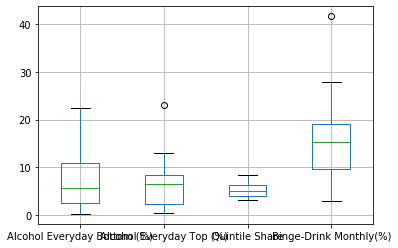

In [60]:
alcohol_country2.dropna().boxplot(column=['Alcohol Everyday Bottom (%)', 'Alcohol Everyday Top (%)', "Quintile Share", "Binge-Drink Monthly(%)"])

In [61]:
alcohol_country3 = alcohol_country2.drop(columns=["Alcohol Everyday (%)"], index=[0, 1, 9, 33])
#removing total alcohol consumption to study income percetile break down and removing outliers calculated wiht IQR +-1.5x
alcohol_country3

GEO  Quintile Share  Alcohol Deaths  Alcohol Everyday Top (%)  \
2   North Macedonia             7.2             NaN                       NaN   
3           Romania             7.2            1.44                       6.1   
4          Bulgaria             6.8            0.34                       8.7   
5             Spain             6.8            0.59                      11.2   
6           Estonia             6.5            4.51                       2.5   
7            Greece             6.5            0.12                       6.7   
8            Latvia             6.5            6.79                       2.2   
10        Lithuania             6.1            0.91                       0.7   
11            Italy             5.8            0.32                      10.5   
12           Cyprus             5.4            0.73                       3.1   
13   European Union             5.2            2.82                       7.7   
14          Croatia             5.1            5.29                       6.7   
15   United Kingdom             5.1            1.30                       5.8   
16          Germany             5.1            5.83                       8.0   
18           Poland             4.9            3.55                       1.6   
17          Ireland             4.9            0.32                       2.1   
19       Luxembourg             4.4            4.89                       8.5   
20      Switzerland             4.4            2.78                       NaN   
21           France             4.3            4.06                       NaN   
22          Hungary             4.3            3.72                       8.2   
23           Sweden             4.2            2.38                       1.2   
24          Austria             4.1            5.39                       4.3   
25          Denmark             4.1           11.49                      12.9   
26            Malta             4.0            0.39                       8.4   
27         Slovakia             3.9            2.97                       3.4   
28      Netherlands             3.8            2.60                       NaN   
29          Belgium             3.8            3.52                      10.6   
30         Slovenia             3.7            9.67                       9.6   
31          Finland             3.6            4.15                       2.6   
32          Czechia             3.5            1.15                       6.9   
34          Iceland             3.1            0.35                       0.8   

    Alcohol Everyday Bottom (%)  Alcohol Month Top (%)  \
2                           NaN                    NaN   
3                           2.3                   24.5   
4                           9.5                   20.4   
5                          18.4                   18.5   
6                           2.5                   26.0   
7                           8.2                   24.0   
8                           0.9                   26.6   
10                          0.6                   34.9   
11                         16.1                   19.4   
12                          4.6                   20.9   
13                         10.8                   22.2   
14                         11.0                   17.5   
15                          9.9                   16.4   
16                         11.8                   25.2   
18                          2.3                   27.3   
17                          1.9                   27.1   
19                         13.0                   23.6   
20                          NaN                    NaN   
21                          NaN                    NaN   
22                          4.3                   14.9   
23                          4.2                   25.9   
24                          7.6                   31.8   
25                         10.5                   28.6   
26                          5.6

In [62]:
alcohol_country3.head(6)

GEO  Quintile Share  Alcohol Deaths  Alcohol Everyday Top (%)  \
2  North Macedonia             7.2             NaN                       NaN   
3          Romania             7.2            1.44                       6.1   
4         Bulgaria             6.8            0.34                       8.7   
5            Spain             6.8            0.59                      11.2   
6          Estonia             6.5            4.51                       2.5   
7           Greece             6.5            0.12                       6.7   

   Alcohol Everyday Bottom (%)  Alcohol Month Top (%)  \
2                          NaN                    NaN   
3                          2.3                   24.5   
4                          9.5                   20.4   
5                         18.4                   18.5   
6                          2.5                   26.0   
7                          8.2                   24.0   

   Alcohol Month Bottom (%)  Binge-Drink Monthly(%)  
2                       NaN                     NaN  
3                      32.5                    24.3  
4                      31.1                    15.0  
5                      19.5                     6.7  
6                      37.0                    18.1  
7                      28.8                     8.9

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


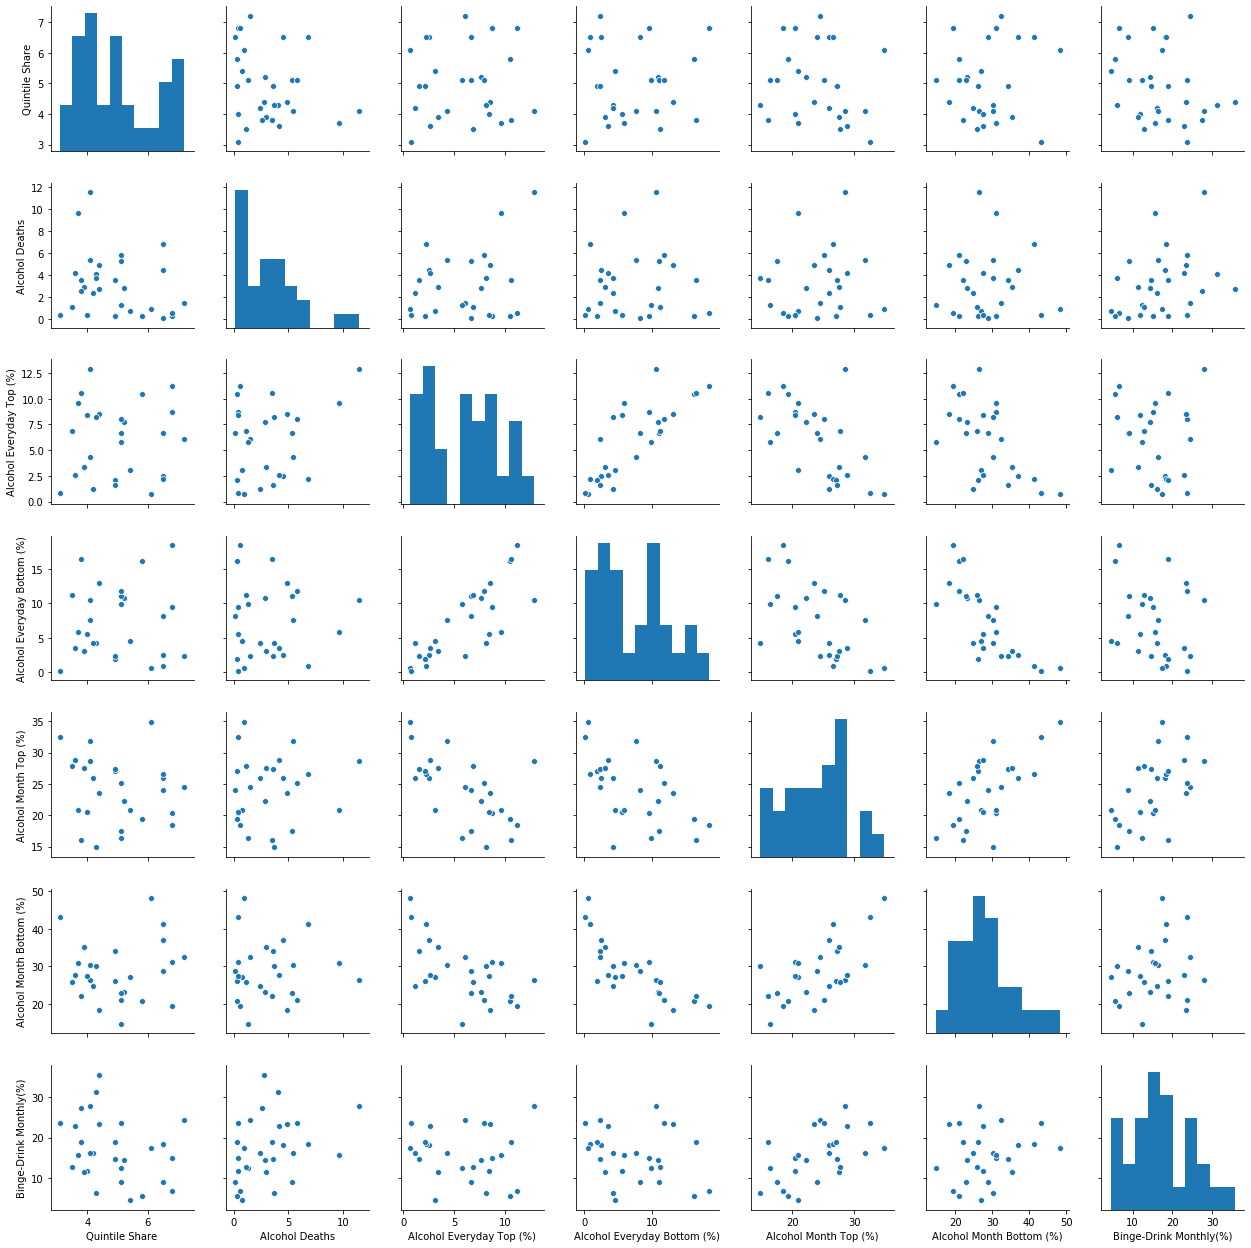

In [63]:
alcohol_country3 = alcohol_country3.sort_values(by=["Quintile Share"], ascending = False)
alcohol_country2 = alcohol_country2.sort_values(by=["Quintile Share"], ascending = False)
#sns.pairplot(data=alcohol_country3.dropna().head(7), kind="reg", plot_kws={'line_kws':{'color':'red'} ,'scatter_kws':{'alpha':0.7}})
sns.pairplot(data=alcohol_country3)#, kind="reg", plot_kws={'line_kws':{'color':'red'} ,'scatter_kws':{'alpha':0.7}})

#alcohol_country3.shape#(6)

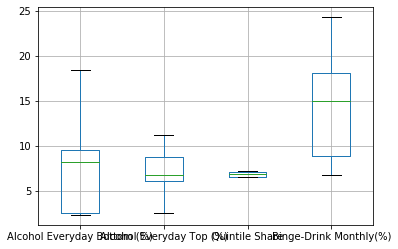

In [64]:
alcohol_country3.head(6).boxplot(column=['Alcohol Everyday Bottom (%)', 'Alcohol Everyday Top (%)', "Quintile Share", "Binge-Drink Monthly(%)"])


In [65]:
#IQR_bottom = (75% - 25%) *1.5 + or - mean
alcohol_country3["Binge-Drink Monthly(%)"].describe()

count    30.000000
mean     17.106667
std       7.778482
min       4.500000
25%      11.950000
50%      16.250000
75%      23.200000
max      35.600000
Name: Binge-Drink Monthly(%), dtype: float64

In [66]:
alcohol_country3.corr()

Quintile Share  Alcohol Deaths  \
Quintile Share                     1.000000       -0.266075   
Alcohol Deaths                    -0.266075        1.000000   
Alcohol Everyday Top (%)           0.020266        0.262491   
Alcohol Everyday Bottom (%)        0.045074        0.026640   
Alcohol Month Top (%)             -0.157065        0.090075   
Alcohol Month Bottom (%)           0.100774        0.005676   
Binge-Drink Monthly(%)            -0.274276        0.339952   

                             Alcohol Everyday Top (%)  \
Quintile Share                               0.020266   
Alcohol Deaths                               0.262491   
Alcohol Everyday Top (%)                     1.000000   
Alcohol Everyday Bottom (%)                  0.806580   
Alcohol Month Top (%)                       -0.598354   
Alcohol Month Bottom (%)                    -0.594104   
Binge-Drink Monthly(%)                      -0.107653   

                             Alcohol Everyday Bottom (%)  \
Quintile Share                                  0.045074   
Alcohol Deaths                                  0.026640   
Alcohol Everyday Top (%)                        0.806580   
Alcohol Everyday Bottom (%)                     1.000000   
Alcohol Month Top (%)                          -0.547251   
Alcohol Month Bottom (%)                       -0.772350   
Binge-Drink Monthly(%)                         -0.225697   

                             Alcohol Month Top (%)  Alcohol Month Bottom (%)  \
Quintile Share                           -0.157065                  0.100774   
Alcohol Deaths                            0.090075                  0.005676   
Alcohol Everyday Top (%)                 -0.598354                 -0.594104   
Alcohol Everyday Bottom (%)              -0.547251                 -0.772350   
Alcohol Month Top (%)                     1.000000                  0.632808   
Alcohol Month Bottom (%)                  0.632808                  1.000000   
Binge-Drink Monthly(%)                    0.539901                  0.202695   

                             Binge-Drink Monthly(%)  
Quintile Share                            -0.274276  
Alcohol Deaths                             0.339952  
Alcohol Everyday Top (%)                  -0.107653  
Alcohol Everyday Bottom (%)               -0.225697  
Alcohol Month Top (%)                      0.539901  
Alcohol Month Bottom (%)                   0.202695  
Binge-Drink Monthly(%)                     1.000000

In [67]:
alcohol_country3.dropna().shape

(27, 8)

6.7 6.966666666666668 5.6499999999999995 6.233333333333334


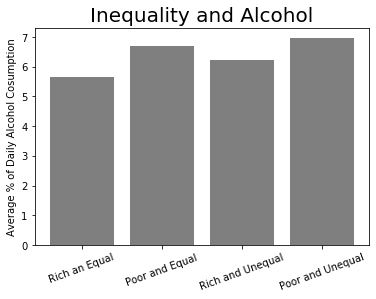

In [68]:
poor_equal_avg = alcohol_country3["Alcohol Everyday Bottom (%)"].dropna().tail(6).mean()
# 5th income percentile alcohol consumption on bottom 25% inequal countries

poor_unequal_avg = alcohol_country3["Alcohol Everyday Bottom (%)"].dropna().head(6).mean()
# 5th income percentile alcohol consumption on top 25% inequal countries

rich_equal_avg = alcohol_country3["Alcohol Everyday Top (%)"].dropna().tail(6).mean()
# 1st income percentile alcohol consumption on bottom 25% inequal countries

rich_unequal_avg =alcohol_country3["Alcohol Everyday Top (%)"].dropna().head(6).mean()
# 1st income percentile alcohol consumption on top 25% inequal countries

print(poor_equal_avg,poor_unequal_avg, rich_equal_avg,rich_unequal_avg)
objects = ('Rich an Equal', 'Poor and Equal', 'Rich and Unequal', 'Poor and Unequal')
y_pos = np.arange(len(objects))
performance = [rich_equal_avg,poor_equal_avg,rich_unequal_avg,poor_unequal_avg]

bar = plt.bar(y_pos, performance, align='center', alpha=0.5, color= "xkcd:black")

plt.xticks(y_pos, objects, rotation= 20)
plt.ylabel('Average % of Daily Alcohol Cosumption')
plt.title('Inequality and Alcohol', fontsize = 20)
plt.savefig('Inequality and Alcohol.png',bbox_inches='tight')
plt.show()


In [69]:
alcohol_country3["Quintile Share"].describe()

count    31.000000
mean      4.977419
std       1.204909
min       3.100000
25%       4.050000
50%       4.900000
75%       5.950000
max       7.200000
Name: Quintile Share, dtype: float64

In [70]:
eu_map = europe.drop(columns=["continent","pop_est","iso_a3","gdp_md_est"])
eu_map.head(1)

Country                                           geometry
21  Norway  POLYGON ((31.10104220259763 69.55810108805622,...

In [71]:
#alcohol_country3 = alcohol_country3.rename(columns={"GEO": "Country"})
alcohol_country2 = alcohol_country2.rename(columns={"GEO": "Country"})
eu_map_stats = eu_map.merge(alcohol_country2, on = "Country", how = "left" )
eu_map_stats.head(40)

Country                                           geometry  \
0             Norway  POLYGON ((31.10104220259763 69.55810108805622,...   
1             France  POLYGON ((6.186320428094177 49.46380280211451,...   
2             Sweden  POLYGON ((11.02736860519687 58.85614940045936,...   
3            Belarus  POLYGON ((28.17670942557794 56.16912995057879,...   
4            Ukraine  POLYGON ((31.78599244755525 52.1016775699397, ...   
5             Poland  POLYGON ((23.48412763844985 53.91249766704114,...   
6            Austria  POLYGON ((16.97966678230404 48.12349701597631,...   
7            Hungary  POLYGON ((22.08560835133486 48.42226430927179,...   
8            Moldova  POLYGON ((26.6193367855978 48.22072622333347, ...   
9            Romania  POLYGON ((28.23355350109904 45.48828318946829,...   
10         Lithuania  POLYGON ((26.49433149588376 55.61510691997763,...   
11            Latvia  POLYGON ((27.28818484875151 57.47452830670383,...   
12           Estonia  POLYGON ((27.98112685700099 59.47537333432527,...   
13           Germany  POLYGON ((14.11968631354256 53.75702912049104,...   
14          Bulgaria  POLYGON ((22.65714969248299 44.23492300066128,...   
15            Greece  (POLYGON ((26.2900028826017 35.29999034274793,...   
16           Albania  POLYGON ((21.0200403174764 40.84272695572588, ...   
17           Croatia  POLYGON ((16.56480838386486 46.50375092221983,...   
18       Switzerland  POLYGON ((9.59422610844635 47.52505809182027, ...   
19        Luxembourg  POLYGON ((6.043073357781111 50.12805166279423,...   
20           Belgium  POLYGON ((6.15665815595878 50.80372101501058, ...   
21       Netherlands  POLYGON ((6.905139601274129 53.48216217713065,...   
22          Portugal  POLYGON ((-9.034817674180246 41.88057058365968...   
23             Spain  POLYGON ((-7.453725551778092 37.09778758396607...   
24           Ireland  POLYGON ((-6.197884894220991 53.86756500916336...   
25             Italy  (POLYGON ((10.44270145024663 46.89354625099743...   
26           Denmark  (POLYGON ((9.921906365609118 54.98310415304803...   
27    United Kingdom  (POLYGON ((-6.197884894220991 53.8675650091633...   
28           Iceland  POLYGON ((-14.50869544112923 66.45589223903143...   
29          Slovenia  POLYGON ((13.80647545742153 46.50930613869122,...   
30           Finland  POLYGON ((28.59192955904319 69.06477692328666,...   
31          Slovakia  POLYGON ((22.55813764821175 49.08573802346714,...   
32           Czechia  POLYGON ((15.01699588385867 51.10667409932158,...   
33  Bosnia and Herz.  POLYGON ((18.55999999999995 42.64999999999998,...   
34         Macedonia  POLYGON ((22.38052575042459 42.32025950781509,...   
35            Serbia  POLYGON ((18.82982479287395 45.90887235802528,...   
36        Montenegro  POLYGON ((20.07070000000004 42.58863000000008,...   
37            Kosovo  POLYGON ((20.59024654668023 41.85540891928363,...   

    Quintile Share  Alcohol Deaths  Alcohol Everyday (%)  \
0              3.4            3.31                   2.1   
1              4.3            4.06                   NaN   
2              4.2            2.38                   2.7   
3              NaN             NaN                   NaN   
4              NaN             NaN                   NaN   
5              4.9            3.55                   1.8   
6              4.1            5.39                   6.2   
7              4.3            3.72                   7.3   
8              NaN             NaN                   NaN   
9              7.2            1.44                   3.8   
10             6.1            0.91                   0.6   
11             6.5            6.79                   1.4   
12             6.5            4.51                   2.0   
13             5.1            5.83                   9.3   
14             6.8            0.34                   8.9   
15             6.5            0.12                   6.9   
16             NaN             NaN                   NaN   
17     

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


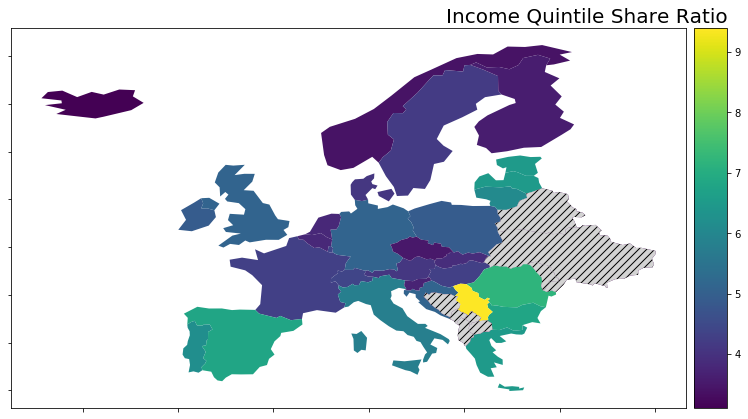

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)


map_map = eu_map_stats.plot(column= "Quintile Share" , ax=ax, legend=True, cax=cax)
ax.set_yticklabels([])
ax.set_xticklabels([])
eu_map_stats[eu_map_stats["Quintile Share"].isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title("Income Quintile Share Ratio", fontsize = 20, loc="right")
plt.plot() 
fig = map_map.get_figure()
fig.savefig("Quintile Share.png",bbox_inches='tight')

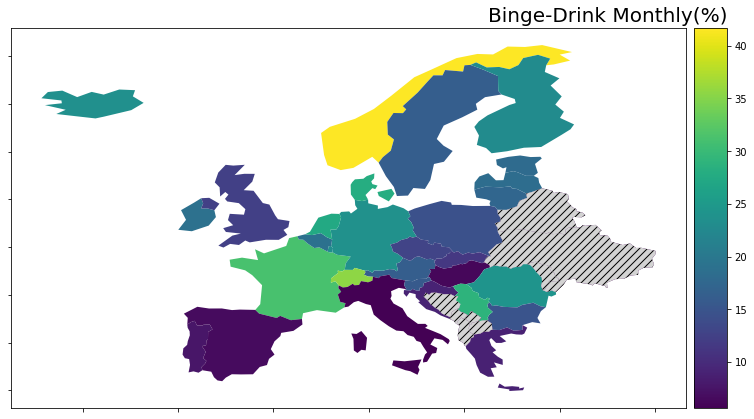

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)


map_map = eu_map_stats.plot(column= "Binge-Drink Monthly(%)" , ax=ax, legend=True, cax=cax)
ax.set_yticklabels([])
ax.set_xticklabels([])
eu_map_stats[eu_map_stats["Binge-Drink Monthly(%)"].isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title("Binge-Drink Monthly(%)", fontsize = 20, loc="right")
plt.plot() 
fig = map_map.get_figure()
fig.savefig("Binge-Drink Monthly.png",bbox_inches='tight')

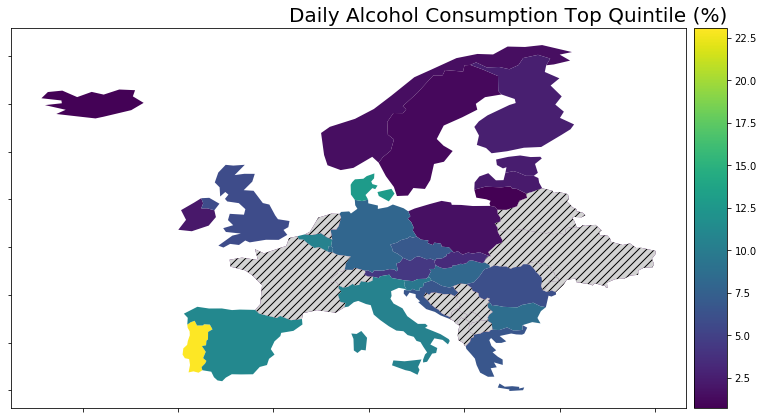

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)


map_map = eu_map_stats.plot(column= "Alcohol Everyday Top (%)" , ax=ax, legend=True, cax=cax)
ax.set_yticklabels([])
ax.set_xticklabels([])
eu_map_stats[eu_map_stats["Alcohol Everyday Top (%)"].isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title("Daily Alcohol Consumption Top Quintile (%)", fontsize = 20, loc="right")
plt.plot()
fig = map_map.get_figure()
fig.savefig("Alcohol Everyday Top (%).png",bbox_inches='tight')

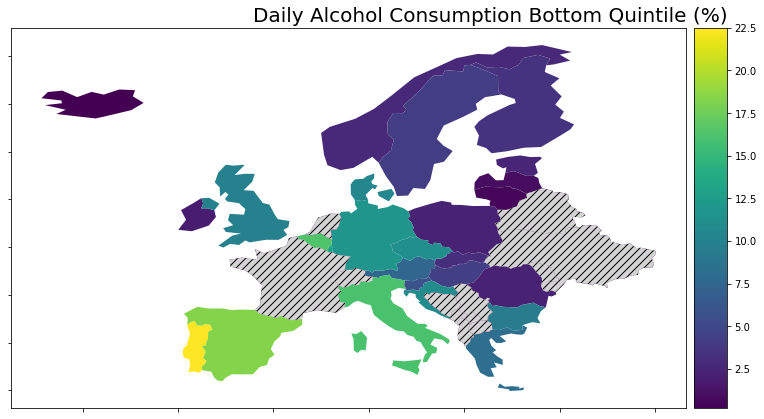

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)


map_map = eu_map_stats.plot(column= "Alcohol Everyday Bottom (%)" , ax=ax, legend=True, cax=cax)#, cmap="coolwarm")
ax.set_yticklabels([])
ax.set_xticklabels([])
eu_map_stats[eu_map_stats["Alcohol Everyday Bottom (%)"].isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title("Daily Alcohol Consumption Bottom Quintile (%)", fontsize = 20, loc="right")
plt.plot()
fig = map_map.get_figure()
fig.savefig("Alcohol Everyday Bottom.png",bbox_inches='tight')

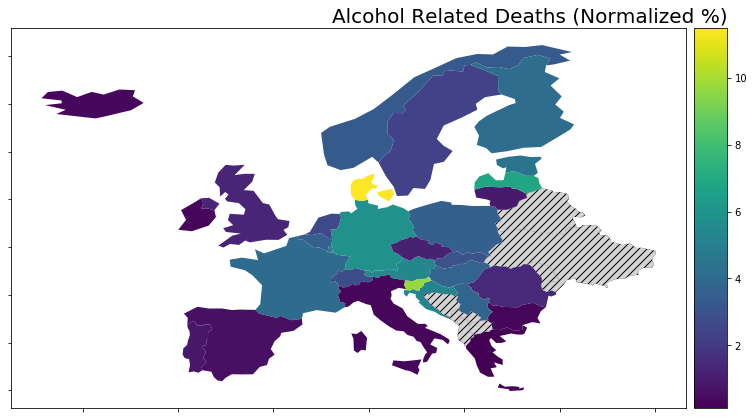

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)


map_map = eu_map_stats.plot(column= "Alcohol Deaths" , ax=ax, legend=True, cax=cax )
ax.set_yticklabels([])
ax.set_xticklabels([])
eu_map_stats[eu_map_stats["Alcohol Deaths"].isna()].plot(color='lightgrey', hatch='///', ax=ax)
plt.title("Alcohol Related Deaths (Normalized %)", fontsize = 20, loc="right")
plt.plot()
fig = map_map.get_figure()
fig.savefig("Alcohol Deaths.png",bbox_inches='tight')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


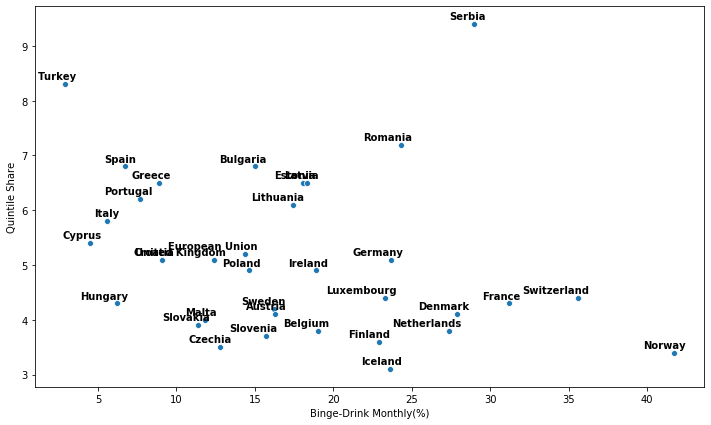

In [77]:
#new_plot= new_plot.rename(columns={"Happiness Score": "Happiness_Score" , "Gini Index" : "Gini"})

plt.figure(figsize=(12,7))

g1 = sns.scatterplot('Binge-Drink Monthly(%)', 'Quintile Share', data=alcohol_country2, legend=False)#, size=10)
for line in range(0,alcohol_country2.shape[0]):
     g1.text(alcohol_country2['Binge-Drink Monthly(%)'][line]+0.75, alcohol_country2['Quintile Share'][line]+0.05, 
     alcohol_country2.Country[line], horizontalalignment='right',  verticalalignment='bottom',
     size='medium', color='black', weight='semibold')

In [78]:
#plt.matshow(alcohol_country3.corr(), cmap= "magma")
#plt.show()


In [86]:
matrix = alcohol_country3.corr().style.background_gradient(cmap='RdYlGn',axis=None).set_precision(2)
matrix

In [80]:
alcohol_country2.head(3)

Country  Quintile Share  Alcohol Deaths  Alcohol Everyday (%)  \
0           Serbia             9.4            3.79                   NaN   
1           Turkey             8.3            0.05                   0.5   
2  North Macedonia             7.2             NaN                   NaN   

   Alcohol Everyday Top (%)  Alcohol Everyday Bottom (%)  \
0                       NaN                          NaN   
1                       0.4                          0.7   
2                       NaN                          NaN   

   Alcohol Month Top (%)  Alcohol Month Bottom (%)  Binge-Drink Monthly(%)  
0                    NaN                       NaN                    29.0  
1                    3.3                       8.1                     2.9  
2                    NaN                       NaN                     NaN

In [81]:
alcohol_country4 = alcohol_country2.iloc[np.r_[0:5, -5:0]]
alcohol_country4 = alcohol_country4[["Country",'Quintile Share']].copy()
alcohol_country4.reset_index(drop=True)

Country  Quintile Share
0           Serbia             9.4
1           Turkey             8.3
2  North Macedonia             7.2
3          Romania             7.2
4         Bulgaria             6.8
5         Slovenia             3.7
6          Finland             3.6
7          Czechia             3.5
8           Norway             3.4
9          Iceland             3.1

In [82]:
alcohol_country2 = alcohol_country2.sort_values(by="Alcohol Deaths", ascending=False)
alcohol_country41 = alcohol_country2[["Country",'Alcohol Deaths']].dropna().copy()
alcohol_country41 = alcohol_country41.iloc[np.r_[0:5, -5:0]]
alcohol_country41.reset_index(drop=True)

Country  Alcohol Deaths
0   Denmark           11.49
1  Slovenia            9.67
2    Latvia            6.79
3   Germany            5.83
4   Austria            5.39
5  Bulgaria            0.34
6     Italy            0.32
7   Ireland            0.32
8    Greece            0.12
9    Turkey            0.05